In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Job_Placement_Data.csv")
df.head(3)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed


# 1 preprocessing step

In [4]:
df.shape

(215, 13)

In [5]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [8]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


# 2 EDA(Export Data Analysis)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

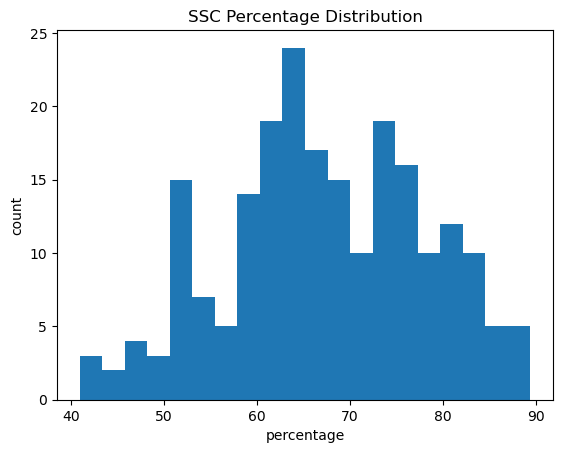

In [16]:
plt.hist(df['ssc_percentage'],bins=20)
plt.title("SSC Percentage Distribution")
plt.xlabel('percentage')
plt.ylabel('count')
plt.show()

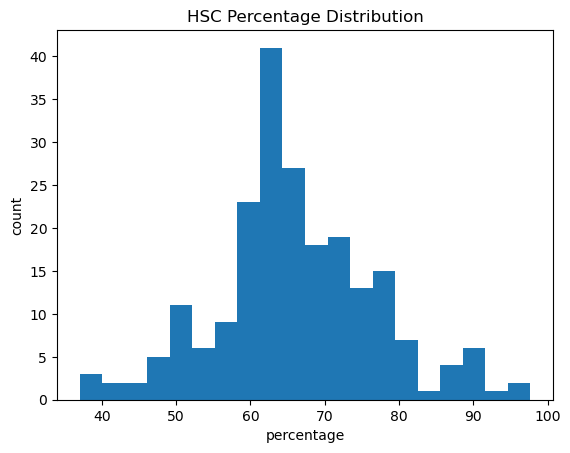

In [18]:
plt.hist(df['hsc_percentage'],bins=20)
plt.title("HSC Percentage Distribution")
plt.xlabel('percentage')
plt.ylabel('count')
plt.show()

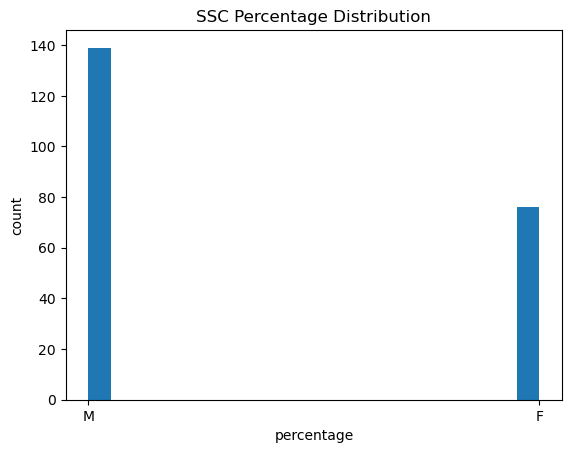

In [19]:
plt.hist(df['gender'],bins=20)
plt.title("SSC Percentage Distribution")
plt.xlabel('percentage')
plt.ylabel('count')
plt.show()

In [20]:
df['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

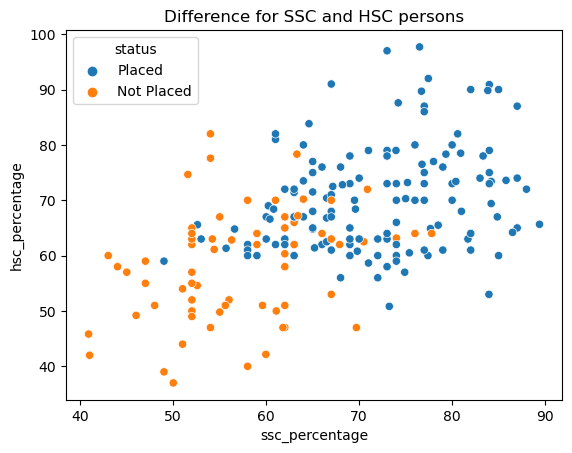

In [28]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage', data=df, hue='status')
plt.title("Difference for SSC and HSC persons")
plt.show()

In [29]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# Convert Categorical variables into Numerical

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [128]:
print(df.columns.tolist())



['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent', 'status', 'gender_M', 'ssc_board_Others', 'hsc_board_Others', 'hsc_subject_Commerce', 'hsc_subject_Science', 'undergrad_degree_Others', 'undergrad_degree_Sci&Tech', 'work_experience_Yes', 'specialisation_Mkt&HR']


In [40]:
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


# Train Test Split

In [49]:
x=df.drop(['status'],axis=1)
y=df['status']
print(x.shape,'\n\n',y.shape)

(215, 12) 

 (215,)


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [55]:
>>> X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [56]:
X_train.shape

(172, 12)

In [57]:
X_test.shape

(43, 12)

# Train Model

In [58]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [70]:
df = pd.read_csv("Job_Placement_Data.csv")


In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])  # Placed = 1, Not Placed = 0



In [72]:
df = pd.get_dummies(df, columns=['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','specialisation'], drop_first=True)


In [73]:
X = df.drop('status', axis=1)
y = df['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [74]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)


In [75]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7906976744186046


# prediction system

In [85]:
print(X.columns.tolist())


['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent', 'gender_M', 'ssc_board_Others', 'hsc_board_Others', 'hsc_subject_Commerce', 'hsc_subject_Science', 'undergrad_degree_Others', 'undergrad_degree_Sci&Tech', 'work_experience_Yes', 'specialisation_Mkt&HR']


In [96]:
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,True,True,True,True,False,False,True,False,True
1,79.33,78.33,77.48,86.5,66.28,1,True,False,True,False,True,False,True,True,False
2,65.00,68.00,64.00,75.0,57.80,1,True,False,False,False,False,False,False,False,False
3,56.00,52.00,52.00,66.0,59.43,0,True,False,False,False,True,False,True,False,True
4,85.80,73.60,73.30,96.8,55.50,1,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,True,True,True,True,False,False,False,False,False
211,58.00,60.00,72.00,74.0,53.62,1,True,True,True,False,True,False,True,False,False
212,67.00,67.00,73.00,59.0,69.72,1,True,True,True,True,False,False,False,True,False
213,74.00,66.00,58.00,70.0,60.23,1,False,True,True,True,False,False,False,False,True


In [108]:
df = df.astype(int)


In [109]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [111]:
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
0,67,91,58,55,58,1,1,1,1,1,0,0,1,0,1
1,79,78,77,86,66,1,1,0,1,0,1,0,1,1,0
2,65,68,64,75,57,1,1,0,0,0,0,0,0,0,0
3,56,52,52,66,59,0,1,0,0,0,1,0,1,0,1
4,85,73,73,96,55,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80,82,77,91,74,1,1,1,1,1,0,0,0,0,0
211,58,60,72,74,53,1,1,1,1,0,1,0,1,0,0
212,67,67,73,59,69,1,1,1,1,1,0,0,0,1,0
213,74,66,58,70,60,1,0,1,1,1,0,0,0,0,1


In [117]:
df


,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
0,67,91,58,55,58,1,1,1,1,1,0,0,1,0,1
1,79,78,77,86,66,1,1,0,1,0,1,0,1,1,0
2,65,68,64,75,57,1,1,0,0,0,0,0,0,0,0
3,56,52,52,66,59,0,1,0,0,0,1,0,1,0,1
4,85,73,73,96,55,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80,82,77,91,74,1,1,1,1,1,0,0,0,0,0
211,58,60,72,74,53,1,1,1,1,0,1,0,1,0,0
212,67,67,73,59,69,1,1,1,1,1,0,0,0,1,0
213,74,66,58,70,60,1,0,1,1,1,0,0,0,0,1


In [116]:
input_data = (67.0, 91.0, 58.0, 55.0, 58.8, 1, 1, 1, 1, 0, 0, 1, 0, 1)  # 14 values matching the trained model
np_array = np.asarray(input_data)
reshaped_array = np_array.reshape(1, -1)

prediction = lg.predict(reshaped_array)
if prediction[0] == 1:
    print("person is placed")
else:
    print("person is not placed")


person is placed


C:\Users\makke\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [2]:
import pickle
pickle.dump(lg,open('placement.pkl','wb'))

NameError: name 'lg' is not defined